In [18]:
from pyciemss import PetriNetODE

In [27]:
import os

from pyciemss.PetriNetODE.base import BetaNoisePetriNetODESystem
from pyciemss.PetriNetODE.interfaces import load_petri_model, setup_model, sample, calibrate
import pyciemss
import numpy as np

Let's see what directory we're in

In [28]:
import os
os.getcwd()

'/home/chads/git/askem/pyciemss/notebook'

Most of our files are relative to `test/models/`, so we need to go up a directory.

In [29]:
model = load_petri_model("./evaluation/scenario3_biomd958.json", add_uncertainty=True)

In [30]:
model.state_dict()

OrderedDict([('default_initial_state_Asymptomatic', tensor(0.)),
             ('default_initial_state_Exposed', tensor(0.)),
             ('default_initial_state_Fatalities', tensor(0.)),
             ('default_initial_state_Hospitalised', tensor(0.)),
             ('default_initial_state_Infectious', tensor(1.)),
             ('default_initial_state_Recovered', tensor(0.)),
             ('default_initial_state_Super_spreaders', tensor(5.)),
             ('default_initial_state_Susceptible', tensor(43994.)),
             ('pseudocount', tensor(1))])

In [31]:
model = setup_model(model, start_time=0.0, start_state=dict(Asymptomatic=0.0, 
                                                            Exposed=0.0,
                                                            Fatalities=0.0,
                                                            Hospitalised=0.0,
                                                            Infectious=1.0,
                                                            Recovered=0.0,
                                                            Super_spreaders=5.0,
                                                            Susceptible=43994.))

In [32]:
model

BetaNoisePetriNetODESystem((rate_(('Susceptible', ('identity', 'ido:0000514')), ('Exposed', ('identity', 'apollosv:00000154')), ('Infectious', ('identity', 'apollosv:00000163')), 'ControlledConversion', 'rate')=Uniform(low: 0.0, high: 1.0)), (rate_(('Susceptible', ('identity', 'ido:0000514')), ('Exposed', ('identity', 'apollosv:00000154')), ('Hospitalised', ('identity', 'ncit:C25179')), 'ControlledConversion', 'rate')=Uniform(low: 0.0, high: 1.0)), (rate_(('Susceptible', ('identity', 'ido:0000514')), ('Exposed', ('identity', 'apollosv:00000154')), ('Super_spreaders', ('identity', 'ido:0000463')), 'ControlledConversion', 'rate')=Uniform(low: 0.0, high: 1.0)), (rate_(('Exposed', ('identity', 'apollosv:00000154')), ('Asymptomatic', ('identity', 'ido:0000511'), ('disease_status', 'ncit:C3833')), 'NaturalConversion', 'rate')=Uniform(low: 0.0, high: 1.0)), (rate_(('Exposed', ('identity', 'apollosv:00000154')), ('Super_spreaders', ('identity', 'ido:0000463')), 'NaturalConversion', 'rate')=Uni

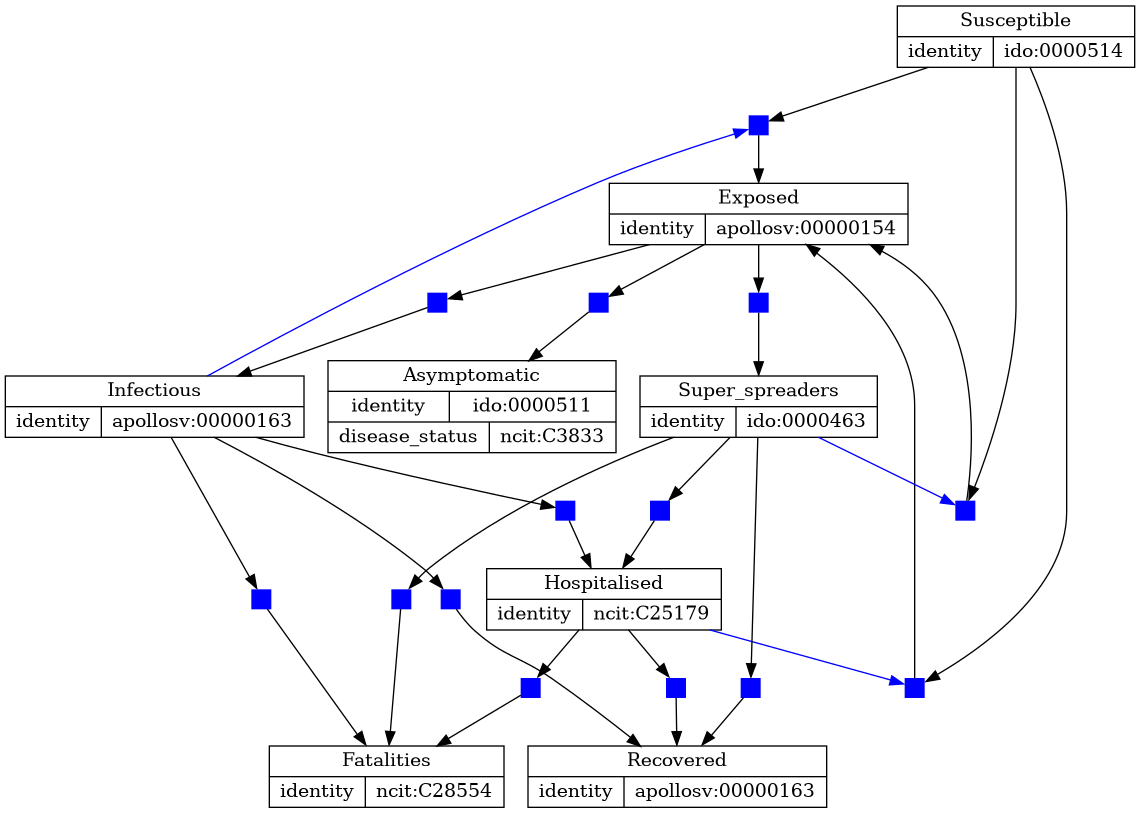

In [33]:
MODEL_NAME = "biomd958"
import mira
from mira.modeling.viz import GraphicalModel
mira.modeling.viz.GraphicalModel.for_jupyter(model.G.template_model, name=f"viz_{MODEL_NAME}.png")

In [34]:
import matplotlib.pyplot as plt

def plot_sample(times, s, names, alpha=1, **kwargs):
    for i,name in enumerate(names):
        for trajectory in s[name]:
            plt.plot(times, trajectory, label=name, alpha=alpha, color='C' + str(i), **kwargs)

In [35]:
import torch
model.pseudocount = torch.tensor(1000.0)

In [36]:
import random
import pyro
pyro.set_rng_seed(3)
random.seed(0)
times = np.linspace(0.01, 30, 100)
num_samples = 100
data = sample(model, times, num_samples)

In [39]:
data

{"rate_(('Susceptible', ('identity', 'ido:0000514')), ('Exposed', ('identity', 'apollosv:00000154')), ('Infectious', ('identity', 'apollosv:00000163')), 'ControlledConversion', 'rate')": tensor([0.1809, 0.3686, 0.4301, 0.8548, 0.2732, 0.9243, 0.1622, 0.7979, 0.6416,
         0.7514, 0.3284, 0.8764, 0.4926, 0.9378, 0.2184, 0.9438, 0.5517, 0.8477,
         0.5996, 0.8511, 0.4348, 0.2163, 0.9106, 0.3377, 0.7358, 0.8954, 0.2831,
         0.0983, 0.1151, 0.6473, 0.3558, 0.3658, 0.0457, 0.3966, 0.2024, 0.9525,
         0.4919, 0.6673, 0.1690, 0.7504, 0.3375, 0.7698, 0.6808, 0.4942, 0.2430,
         0.2096, 0.5578, 0.3679, 0.5680, 0.6861, 0.5729, 0.1586, 0.6205, 0.2723,
         0.0765, 0.6788, 0.0755, 0.2584, 0.9945, 0.9956, 0.5174, 0.4155, 0.8177,
         0.8652, 0.6692, 0.8137, 0.9364, 0.1812, 0.0936, 0.6661, 0.4733, 0.2245,
         0.0814, 0.8120, 0.9505, 0.2219, 0.4556, 0.8755, 0.6810, 0.5306, 0.7656,
         0.3809, 0.6052, 0.6022, 0.9310, 0.1468, 0.9043, 0.3117, 0.1330, 0.8994,
    

In [38]:
data.keys()

dict_keys(["rate_(('Susceptible', ('identity', 'ido:0000514')), ('Exposed', ('identity', 'apollosv:00000154')), ('Infectious', ('identity', 'apollosv:00000163')), 'ControlledConversion', 'rate')", "rate_(('Susceptible', ('identity', 'ido:0000514')), ('Exposed', ('identity', 'apollosv:00000154')), ('Hospitalised', ('identity', 'ncit:C25179')), 'ControlledConversion', 'rate')", "rate_(('Susceptible', ('identity', 'ido:0000514')), ('Exposed', ('identity', 'apollosv:00000154')), ('Super_spreaders', ('identity', 'ido:0000463')), 'ControlledConversion', 'rate')", "rate_(('Exposed', ('identity', 'apollosv:00000154')), ('Asymptomatic', ('identity', 'ido:0000511'), ('disease_status', 'ncit:C3833')), 'NaturalConversion', 'rate')", "rate_(('Exposed', ('identity', 'apollosv:00000154')), ('Super_spreaders', ('identity', 'ido:0000463')), 'NaturalConversion', 'rate')", "rate_(('Exposed', ('identity', 'apollosv:00000154')), ('Infectious', ('identity', 'apollosv:00000163')), 'NaturalConversion', 'rate'

In [ ]:
mira.modeling.viz.GraphicalModel.for_jupyter(model.G.template_model, name=f"viz_{MODEL_NAME}.png")

In [10]:
import pyro
mu = data['I_sol'][0][observed_indices]
obs_times = times[observed_indices]
obs_vals = pyro.distributions.Beta(mu * model.pseudocount, (1 - mu) * model.pseudocount).sample()

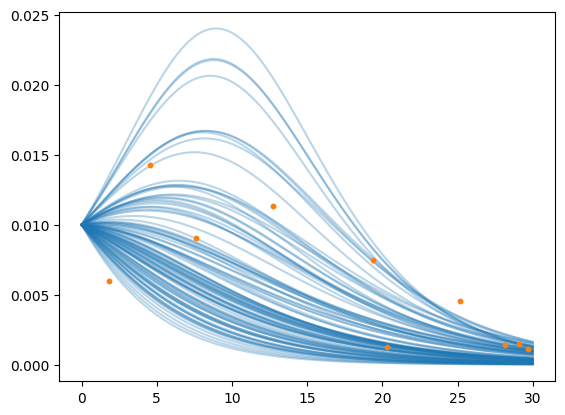

In [30]:
plot_sample(times, data, ('I_sol',), alpha=0.3, zorder=1)
plt.scatter(obs_times, obs_vals, color='C1', zorder=2, s=10)

In [12]:
obs = [(times[j], 
        {var: float(data[var + "_sol"][0,j]) for var in ["S", "I", "R"]})
    for j in observed_indices]

In [13]:
len(obs)

10

In [22]:
post = calibrate(model, obs, verbose=True, num_iterations=300)
post

iteration 0: loss = 291.3385531902313
iteration 25: loss = -92.37012076377869
iteration 50: loss = -119.22490632534027
iteration 75: loss = -117.86052203178406
iteration 100: loss = -113.73650884628296
iteration 125: loss = -116.79984641075134
iteration 150: loss = -118.32231855392456
iteration 175: loss = -117.6040608882904
iteration 200: loss = -117.36278343200684
iteration 225: loss = -117.13619816303253
iteration 250: loss = -117.95557451248169
iteration 275: loss = -117.52828669548035


AutoLowRankMultivariateNormal()

In [23]:
post_sample = sample(model, np.linspace(0.01, 30, 100), 100, inferred_parameters=post)

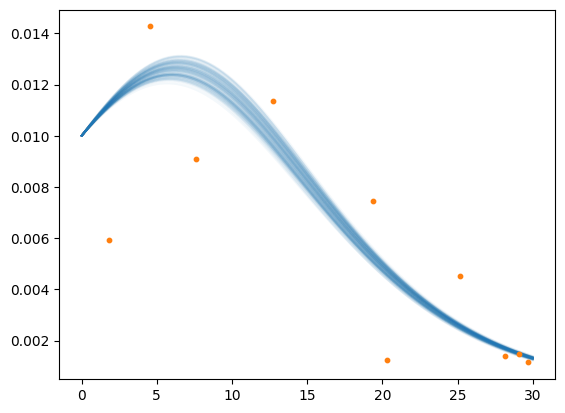

In [28]:
plot_sample(times, post_sample, ('I_sol',), alpha=0.05, zorder=1)
plt.scatter(times[observed_indices], obs_vals, color='C1', zorder=2, s=10)

Text(0, 0.5, 'a_gamma')

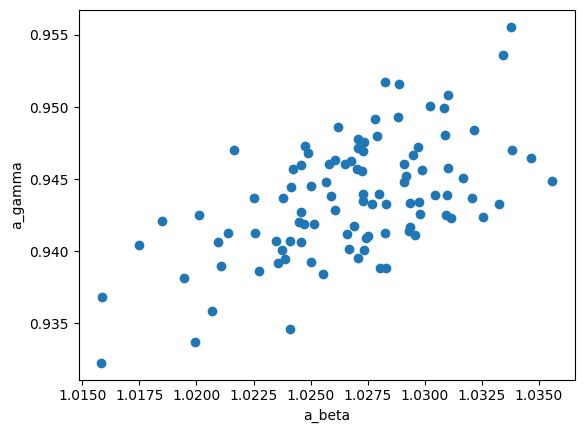

In [25]:
plt.scatter(post_sample["a_beta"], post_sample["a_gamma"])
plt.xlabel("a_beta")
plt.ylabel("a_gamma")